# SOM (Self-Organizing Maps)

## Part-1 SOM

ene shitnii code ni bol yur ni K-Means clustering-tai mash tustei shit baina.

gehdee yalgaa ni gevel ene neuron ashiglaj baigaa. ehleed neuron-uudiin weight ni randon baih ch gesen ted nar ni update hiigdeed yavna.

Ehleed BMU(Best Matching Unit) geed busad points ruugaa euclidean distance hamgiin oirhon point-uudiig songood  , tegeed buh neuron-oo zaigaar in weight-iig ni update hiigeed yavna.

Tegeh tusam ni , BMU ch soligdono , group-d ni hariyalagdah points-uud ch uurchlugduud l yavaad bainaa gesen ug.

Tegeed points-uudiinh ni distance ni holtoi shit ni anomaly buyu possible fraud shits bolnoo l gesen ug.



### Importing Libraries

In [4]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=c87e5a780d286ccf1ac9d868c9e6d1f2aba2e127905d71acaffa144643125a6a
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [53]:
dataset = pd.read_csv("Credit_Card_Applications.csv")
x = dataset.iloc[:,:-1].values # ali sda ni fraud hiisen baina gedgiig harahiin tuld,customer_id iiig bailgaj l baiy genee.
y = dataset.iloc[:,-1].values

### Feature Scaling

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(x)

### Training the SOM

In [55]:
from minisom import MiniSom
som = MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5) # len ni bol number of features - including customer_id
som.random_weights_init(X)
som.train_random(X,num_iteration=100)

### Visualising the results

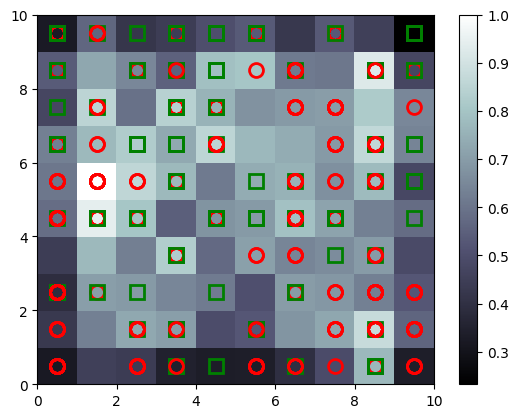

In [56]:
from pylab import bone,colorbar,pcolor,plot,show
bone()  # initiates gray-scale background for the plot.
pcolor(som.distance_map().T) # computes the mean sidtance between neighboring neurons on the grid.
    # areas with higher distance indicate anomalous(potential frauds) data points.
    # these areas are often shown in ligther or distinct colors on the plot.
colorbar()   # ene ni bol legend ni genee.
markers = ['o','s']
colors = ["red","green"] # red ni fraud cases, green is for non-fraud cases.
for i,x in enumerate(X) :
    w = som.winner(x)  # finds the BMU for each data points.
    plot(w[0]+0.5,
         w[1]+0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize=10,
         markeredgewidth=2)
show()

### Finding the frauds

In [58]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,8)],mappings[(5,1)]),axis=0) # ene potential fraud clusters.
 # single list of all suspected fraudulent customers.
 # tsagaan deer ulaanaar temdeglegdsen sus shits-iin index-uudiig avaad,teren deer baigaa elementuudiig gargaj ireh gej baina.

In [59]:
frauds = scaler.inverse_transform(frauds)

### Printing the fraudulent clients

In [60]:
print("Fraud Customer ID's")
for i in frauds[:,0] :
    print(int(i))

Fraud Customer ID's
15776156
15745804
15788224
15764922
15790113
15735330
15809909
15796413
15776921
15790689
15737627
15709459
15655464
15698271
15699340
15609070
15650313
15732884
15684440
15706637
15730673
15779492
15742297
15707042
15645571
15778589
15678779
15702030
15741633
15666297
15769980


## Part-2 Going from Unsupervised to Supervised Deep Learning

### Creating the Matrix of Features

In [61]:
customers = dataset.iloc[:,1:].values

### Creating the Dependent Variable

In [62]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)) :
    if dataset.iloc[i,0] in frauds :  # 1,0 eer burdsen list hiichij bna.
        is_fraud[i] = 1

## Part-3 ANN

### Feature Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customeres = scaler.fit_transform(customers)

### Building the ANN

In [64]:
import tensorflow as tf
tf.__version__

'2.17.1'

In [65]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=2,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

### Training the ANN

In [66]:
ann.fit(customers,is_fraud,batch_size=1,epochs=10)

Epoch 1/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9460 - loss: 136.0294
Epoch 2/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9211 - loss: 24.5300
Epoch 3/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9500 - loss: 37.5041
Epoch 4/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9539 - loss: 51.1240
Epoch 5/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9542 - loss: 8.7642
Epoch 6/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9142 - loss: 19.0585
Epoch 7/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8680 - loss: 23.2784
Epoch 8/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8764 - loss: 2.6455
Epoch 9/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8615 - loss: 1.7766
Epoch 10/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8710 - loss: 2.5371


### Predicting the test set results

In [67]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:,0:1].values,y_pred),axis=1)  # concatenating customer id with fraud predcition score(0,1)
y_pred = y_pred[y_pred[:,1].argsort()] # sorting customers based on their fraud scores in ascending order.
print(y_pred)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
[[1.5735837e+07 0.0000000e+00]
 [1.5642098e+07 0.0000000e+00]
 [1.5801817e+07 0.0000000e+00]
 ...
 [1.5642336e+07 1.0000000e+00]
 [1.5767231e+07 1.0000000e+00]
 [1.5605341e+07 1.0000000e+00]]
